# Exercise 2: Pysam - CGC Interactive analysis

In [2]:
! pip install pysam

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 40.4 MB/s eta 0:00:00


 Create an AlignmentFile object for “merged-tumor.bam”

In [51]:
import pysam
bamfile = pysam.AlignmentFile("merged-tumor.bam", "rb")

In [52]:
num_reads = 0
num_unmapped_reads = 0
reads_mapping_quality = 0
num_reads_mq_0 = 0

for read in bamfile.fetch(until_eof=True):

  # First read from the AlignmentFile
  if num_reads == 0:
    first_read = read
  # Read for flag explanation
  if num_reads == 13:
    read14 = read

  num_reads += 1

  if read.is_unmapped:
    num_unmapped_reads += 1

  mapp_quality = read.mapping_quality
  if mapp_quality == 0:
    num_reads_mq_0 += 1 
  reads_mapping_quality += mapp_quality

First read from the AlignmentFile

In [53]:
print('First read: ', first_read)

First read:  C0HVYACXX120402:7:1207:5722:57044	1187	#20	9483249	27	76M	#20	9483382	209	TTTTCAAACAGTATCTATGCCTGCCAAATGTGAACATATAAAAAAAAACCAGAATGTGCCATTCTGATTTAAACTG	array('B', [28, 28, 27, 29, 31, 30, 31, 31, 29, 31, 35, 30, 29, 31, 34, 30, 29, 23, 41, 32, 20, 30, 29, 34, 34, 29, 30, 31, 30, 30, 30, 33, 33, 26, 39, 12, 25, 19, 32, 30, 35, 28, 35, 33, 23, 33, 35, 36, 30, 38, 33, 41, 34, 35, 31, 33, 23, 30, 30, 36, 27, 32, 29, 34, 35, 41, 33, 31, 33, 29, 32, 32, 31, 31, 31, 34])	[('XA', 'GL000217.1,-110754,76M,1;'), ('BD', 'NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN'), ('MD', '76'), ('RG', '1'), ('BI', 'NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN'), ('NM', 0), ('MQ', 27), ('AS', 76), ('XS', 71)]


Inspect the fields in the AlignedSegment

In [54]:
def fields_in_AlignedSegment(read):
  print(f'QNAME: {read.query_name}')
  print(f'FLAG: {read.flag}')
  print(f'RNAME: {read.rname}')
  print(f'POS: {read.pos}')
  print(f'MAPQ: {read.mapq}')
  print(f'CIGAR: {read.cigarstring}')
  print(f'MRNM: {read.mrnm}')
  print(f'MPOS: {read.mpos}')
  print(f'ISIZE: {read.isize}')
  print(f'SEQ: {read.seq}')
  print(f'Alignment qualities: {read.query_alignment_qualities}')
  print(f'TAGS: {read.tags}')
  print(f'QUAL: {read.qual}')

In [55]:
fields_in_AlignedSegment(first_read)

QNAME: C0HVYACXX120402:7:1207:5722:57044
FLAG: 1187
RNAME: 20
POS: 9483248
MAPQ: 27
CIGAR: 76M
MRNM: 20
MPOS: 9483381
ISIZE: 209
SEQ: TTTTCAAACAGTATCTATGCCTGCCAAATGTGAACATATAAAAAAAAACCAGAATGTGCCATTCTGATTTAAACTG
Alignment qualities: array('B', [28, 28, 27, 29, 31, 30, 31, 31, 29, 31, 35, 30, 29, 31, 34, 30, 29, 23, 41, 32, 20, 30, 29, 34, 34, 29, 30, 31, 30, 30, 30, 33, 33, 26, 39, 12, 25, 19, 32, 30, 35, 28, 35, 33, 23, 33, 35, 36, 30, 38, 33, 41, 34, 35, 31, 33, 23, 30, 30, 36, 27, 32, 29, 34, 35, 41, 33, 31, 33, 29, 32, 32, 31, 31, 31, 34])
TAGS: [('XA', 'GL000217.1,-110754,76M,1;'), ('BD', 'NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN'), ('MD', '76'), ('RG', '1'), ('BI', 'NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN'), ('NM', 0), ('MQ', 27), ('AS', 76), ('XS', 71)]
QUAL: ==<>@?@@>@D?>@C?>8JA5?>CC>?@???BB;H-:4A?D=DB8BDE?GBJCD@B8??E<A>CDJB@B>AA@@@C


Check out the flag for some reads

In [56]:
def check_out_flag (read):
  print(f'FLAG: {read.flag}')
  print(f'Read paired: {read.is_paired}')
  print(f'Read mapped in proper pair: {read.is_proper_pair}')
  print(f'Read unmapped: {read.is_unmapped}')
  print(f'Mate unmapped: {read.mate_is_unmapped}')
  print(f'Read reverse strand: {read.is_reverse}')
  print(f'Mate reverse strand: {read.mate_is_reverse}')
  print(f'First in pair: {read.is_read1}')
  print(f'Second in pair: {read.is_read2}')
  print(f'Not primary alignment: {read.is_secondary}')
  print(f'Read fails platform/vendor quality checks: {read.is_qcfail}')
  print(f'read is PCR or optical duplicate: {read.is_duplicate}')
  print(f'Supplementary alignment: {read.is_supplementary}')

In [57]:
check_out_flag(first_read)

FLAG: 1187
Read paired: True
Read mapped in proper pair: True
Read unmapped: False
Mate unmapped: False
Read reverse strand: False
Mate reverse strand: True
First in pair: False
Second in pair: True
Not primary alignment: False
Read fails platform/vendor quality checks: False
read is PCR or optical duplicate: True
Supplementary alignment: False


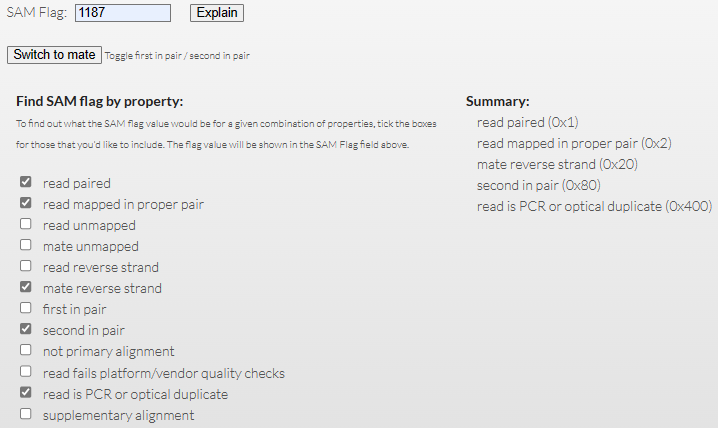

In [58]:
check_out_flag(read14)

FLAG: 163
Read paired: True
Read mapped in proper pair: True
Read unmapped: False
Mate unmapped: False
Read reverse strand: False
Mate reverse strand: True
First in pair: False
Second in pair: True
Not primary alignment: False
Read fails platform/vendor quality checks: False
read is PCR or optical duplicate: False
Supplementary alignment: False


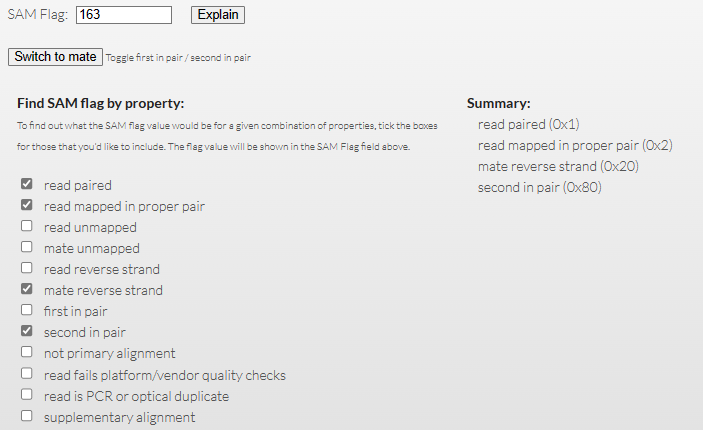

Calculations

In [59]:
print(f'Number of unmapped reads: {num_unmapped_reads}')
print(f'Total number of reads: {num_reads}')
print(f'Number of reads with mapping quality 0: {num_reads_mq_0}')
print(f'Average mapping quality for all reads: {reads_mapping_quality/num_reads}')
print(f'Average mapping quality if reads with 0 mapp quality are filtered out: {reads_mapping_quality/(num_reads - num_reads_mq_0)}')

Number of unmapped reads: 17765
Total number of reads: 2921629
Number of reads with mapping quality 0: 126628
Average mapping quality for all reads: 55.91379158681681
Average mapping quality if reads with 0 mapp quality are filtered out: 58.446975510921106


In [60]:
bamfile.close()